<center> <h1> Machine Learning Assignment 2</h1> </center>
<center> <h1> Gender Identification using Scikit-Learn </h1> </center>
<center> <h1> (Step-wise Tutorial)</h1> </center>
<br><br><br>
<center> <h1> Instructor: Muhammad Tahir Sohail </h1></center>
<center> <h1> Deadline : 14-04-2025 </h1></center>
<center> <h1> Submit format: ipynb file(this file) </h1></center>

**Overview**<br>
The main objective of this tutorial is to provide the complete understanding of gender identification using Machine Learning toolkit (scikit-learn). In this tutorial, we are going to use the structured dataset about male and female. The dataset consists of set of input attributes (Height, Weight, Hair Length, Beard, Scarf) and ouput attribute (Male, Female). The task is to predict male and female from input attributes using Machine Learning algorithms. <br><br>
**Machine Learning Approach:** <br>The problem of Gender Identication is treated as a supervised learning approach because we going to use the labelled dataset.<br><br> **The Input and Output are:**<br>
<b> - Input:</b> Set of Attributes (Height, Weight, Hair Length, Beard, Scarf))<br><br>
<b> - Output:</b> Gender (Male/Female)<br><br>
<b> - Goal:</b> Learn from Input to predict Output<br><br>
    
<h3> Three Phases of Machine Learning: </h3><br><br>
<b>1. Training Phase </b>– Learn from Training Dataset.<br><br>
<b>2. Testing/Validation/Evaluation Phase</b> – Evaluate how well the algorithm learned.<br><br>
<b>3. Application Phase</b>– Use your learned/trained models in real world application.<br><br>


<center><h1> Table of Contents </h1></center>
<h2>PHASE 1 & 2: TRAINING AND TESTING </h2>

**Step 1:** Import Libraries<br><br>
**Step 2:** Read, Understand and Pre-process Train/Test Data<br><br>
**Step 2.1:** Read Data<br><br>
**Step 2.2:** Understand Data<br><br>
**Step 2.3:** Pre-process Data<br><br>
**Step 3:** Label Encoding for Train/Test Data<br><br>
**Step 4:** Feature Extraction – Changing Representation of features “from String to Feature-Vector”<br><br>
**Step 5:** Train Machine Learning Algorithms using Training Data<br><br>
**Step 6:** Evaluate Machine Learning Algorithms using Test Data<br><br>
**Step 7:** Selection of Best Model<br><br><br><br>


<h2> PHASE 3: APPLICATION PHASE</h2><br>
**Step 8:** Application Phase<br><br>
**Step 8.1:** Combine Dataset (Train + Test )¶<br><br>
**Step 8.2:** Train Best Model (see Step 7) on all data(Train+Test)<br><br>
**Step 8.3:** Save the Trained Model in Pickle File<br><br>
**Step 9:** Make predictions on unseen/new data<br><br>
**Step 9.1:** Load the Trained Model (saved in Step 8.3)<br><br>
**Step 9.2:** Take Input from User<br><br>
**Step 9.3:** Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)<br><br>
**Step 9.4:** Apply Trained Model on Feature Vector of Unseen Dataset and Output Prediction (Male/Female) to User


# Step 1: Import Libraries

In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from prettytable import PrettyTable
from astropy.table import Table, Column


# Step 2: Read, Understand & Pre-process Train/Test Data

In [2]:

train_dataset=pd.read_csv("Gender_Identification_train.csv")
train_dataset.head(6)
print("Attributes name in train dataset")
print("================================\n")
print(train_dataset.columns)
print("\nNumber of instances in train dataset")
print("====================================")
print("Train instances:",train_dataset.shape[0])
print("\nTrain dataset")
print("==============")
train_dataset.index.names=['index']
train_dataset.columns.name=train_dataset.index.name
train_dataset.index.name=None
print(train_dataset)

Attributes name in train dataset

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Number of instances in train dataset
Train instances: 6

Train dataset
index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female


In [4]:
test_dataset=pd.read_csv("Gender_Identification_test.csv")
test_dataset.head(4)
print("Attributes name in test dataset")
print("================================\n")
print(test_dataset.columns)
print("\nNumber of instances in test dataset")
print("====================================")
print("Test instances:",test_dataset.shape[0])
print("\nTest dataset")
print("==============")
test_dataset.index.names=['index']
test_dataset.columns.name=test_dataset.index.name
test_dataset.index.name=None
print(test_dataset)

Attributes name in test dataset

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Number of instances in test dataset
Test instances: 4

Test dataset
index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female


In [5]:
train_Male = train_dataset[train_dataset['gender'] == 'Male']
train_Female = train_dataset[train_dataset['gender'] == 'Female']
print(train_Male.shape[0]," Train instances having label 'Male':")
print("======================================")
train_Male.index.names = ['index']
train_Male.columns.name = train_Male.index.name
train_Male.index.name = None
print(train_Male)
print("\n\n\n",train_Female.shape[0]," Train instances having label 'Female':")
print("==========================================")
train_Female.index.names = ['index']
train_Female.columns.name = train_Female.index.name
train_Female.index.name = None
print(train_Female)

3  Train instances having label 'Male':
index    height  weight   hair beard scarf gender
0      180.3000     196   Bald   Yes    No   Male
2      178.5000     200  Short    No    No   Male
4      175.2222     220  Short   Yes    No   Male



 3  Train instances having label 'Female':
index  height  weight    hair beard scarf  gender
1       170.0     120    Long    No    No  Female
3       163.4     110  Medium    No   Yes  Female
5       165.0     150  Medium    No   Yes  Female


In [6]:
test_Male = test_dataset[test_dataset['gender'] == 'Male']
test_Female = test_dataset[test_dataset['gender'] == 'Female']
print("\n\n",test_Male.shape[0]," Test instances having label 'Male':")
print("======================================")
test_Male.index.names = ['index']
test_Male.columns.name = test_Male.index.name
test_Male.index.name = None
print(test_Male)
print("\n\n\n",test_Female.shape[0]," Test instances having label 'Female':")
print("=========================================")
test_Female.index.names = ['index']
test_Female.columns.name = test_Female.index.name
test_Female.index.name = None
print(test_Female)



 2  Test instances having label 'Male':
index  height  weight  hair beard scarf gender
0       179.1     185  Long   Yes    No   Male
2       177.8     160  Bald    No    No   Male



 2  Test instances having label 'Female':
index  height  weight    hair beard scarf  gender
1       160.5     130   Short    No    No  Female
3       161.1     100  Medium    No    No  Female


### Uderstanding Data via Graphs

Total number of 'Males' and 'Females' in Train Dataset


<Axes: xlabel='Gender'>

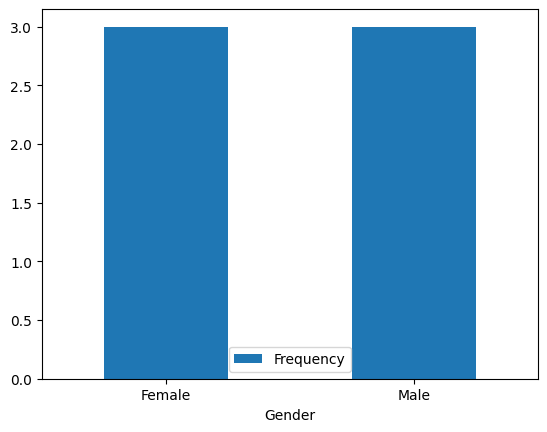

In [7]:
print("Total number of 'Males' and 'Females' in Train Dataset")
print("======================================================")
graph_df = pd.DataFrame({'Gender':['Female', 'Male'],'Frequency':[3,3]})
graph_df.plot.bar(x='Gender', y='Frequency', rot=0)

Total number of 'Males' and 'Females' in Test Dataset


<Axes: xlabel='Gender'>

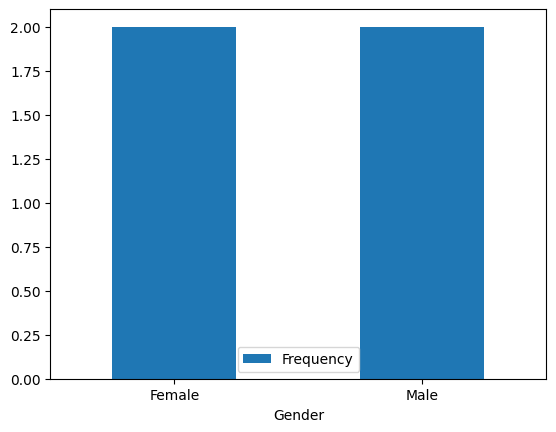

In [8]:
print("Total number of 'Males' and 'Females' in Test Dataset")
print("=====================================================")
graph_df = pd.DataFrame({'Gender':['Female', 'Male'],'Frequency':[2,2]})
graph_df.plot.bar(x='Gender', y='Frequency', rot=0)


Number of people having various hair length in Train dataset:


<Axes: >

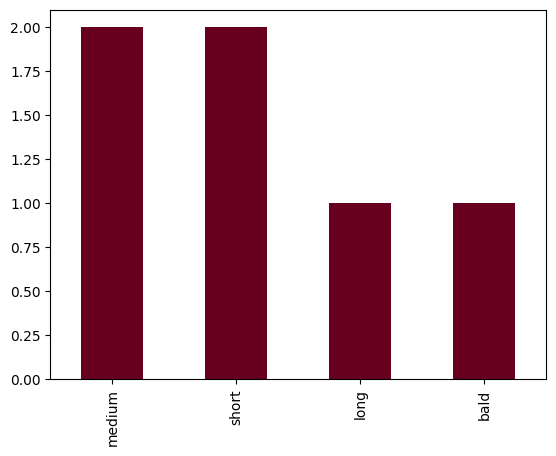

In [9]:
train_hair = pd.Series(' '.join(train_dataset['hair'].astype(str)).lower().split(" ")).value_counts()
print("Number of people having various hair length in Train dataset:")
print("=============================================================")
train_hair.plot(kind='bar',stacked=True, colormap='RdGy')


Number of people having various hair length in Test dataset:


<Axes: >

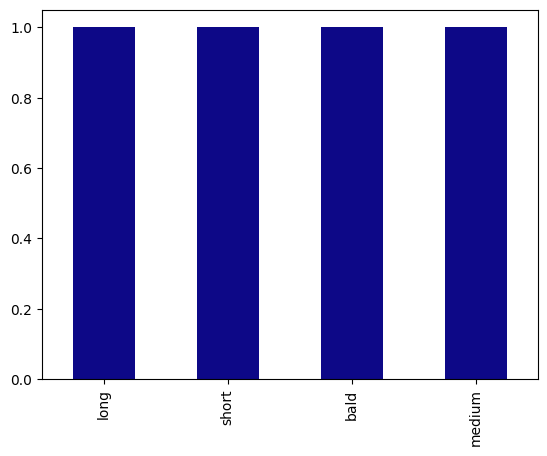

In [10]:
test_hair = pd.Series(' '.join(test_dataset['hair'].astype(str)).lower().split(" ")).value_counts()
print("Number of people having various hair length in Test dataset:")
print("============================================================")
test_hair.plot(kind='bar',stacked=True, colormap='plasma')

Number of people have/haven't beard in Train dataset:


<Axes: >

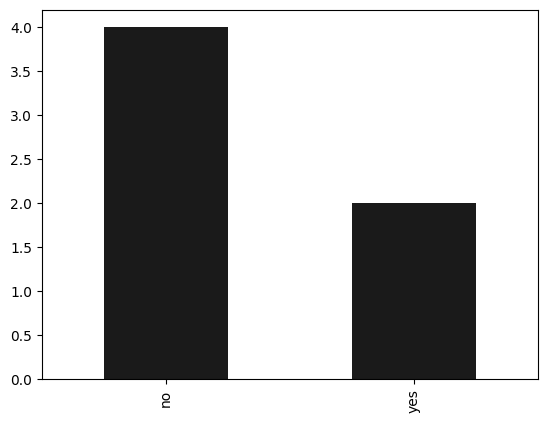

In [11]:
train_beard = pd.Series(' '.join(train_dataset['beard'].astype(str)).lower().split(" ")).value_counts()
print("Number of people have/haven't beard in Train dataset:")
print("====================================================")
train_beard.plot(kind='bar',stacked=True, colormap='RdGy_r')


Number of people have/haven't beard in Test dataset:


<Axes: >

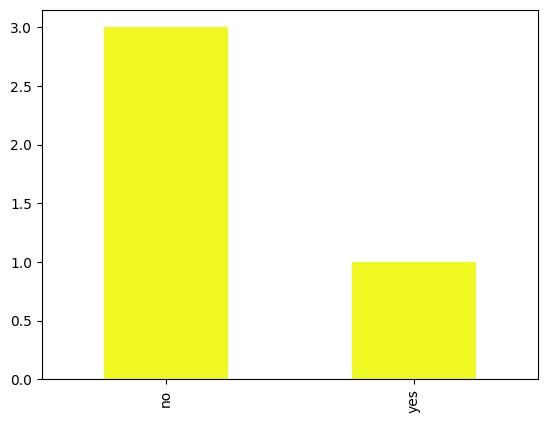

In [12]:
test_beard = pd.Series(' '.join(test_dataset['beard'].astype(str)).lower().split(" ")).value_counts()
print("Number of people have/haven't beard in Test dataset:")
print("====================================================")
test_beard.plot(kind='bar',stacked=True, colormap='plasma_r')


### Step 2.3: Pre-Process Data

In [13]:
print("Train dataset before pre-processing:")
print("===================================")
print(train_dataset)
train_dataset = train_dataset.fillna(' ')
train_dataset.height = round(train_dataset.height,2)
print("\n\n\nTrain dataset after pre-processing:")
print("==================================")
print(train_dataset)



Train dataset before pre-processing:
index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female



Train dataset after pre-processing:
index  height  weight    hair beard scarf  gender
0      180.30     196    Bald   Yes    No    Male
1      170.00     120    Long    No    No  Female
2      178.50     200   Short    No    No    Male
3      163.40     110  Medium    No   Yes  Female
4      175.22     220   Short   Yes    No    Male
5      165.00     150  Medium    No   Yes  Female


# Step 3: Label Encoding for Test/Train Data

#### Label encoding train dataset

In [14]:
labelEncoder_gender = LabelEncoder()
labelEncoder_scarf = LabelEncoder()
labelEncoder_hair = LabelEncoder()
labelEncoder_beard = LabelEncoder()
gender = ['Female','Male']
scarf = ['Yes','No']
beard = ['Yes','No']
hairLength = ['Bald','Long','Short','Medium']
labelEncoder_gender.fit(gender)
labelEncoder_scarf.fit(scarf)
labelEncoder_beard.fit(beard)
labelEncoder_hair.fit(hairLength)
print("Gender Attribute Encoding in Train Dataset:")
print("==========================================")
train_gender_encoding =pd.DataFrame(labelEncoder_gender.transform(train_dataset.gender))
encoded_gender = train_dataset[['gender']]
encoded_gender = encoded_gender.assign(encoded_gender =train_gender_encoding)
print(encoded_gender)
print("\n\n\nScarf Attribute Encoding in Train Dataset:")
print("==========================================")
train_scarf_encoding =pd.DataFrame(labelEncoder_scarf.transform(train_dataset.scarf))
encoded_scarf = train_dataset[['scarf']]
encoded_scarf = encoded_scarf.assign(encoded_scarf =
train_scarf_encoding)
print(encoded_scarf)
print("\n\n\nBeard Attribute Encoding in Train Dataset:")
print("==========================================")
train_beard_encoding =pd.DataFrame(labelEncoder_beard.transform(train_dataset.beard))
encoded_beard = train_dataset[['beard']]
encoded_beard = encoded_beard.assign(encoded_beard =train_beard_encoding)
print(encoded_beard)
print("\n\n\nHair Attribute Encoding in Train Dataset:")
print("========================================")
train_hair_encoding =pd.DataFrame(labelEncoder_hair.transform(train_dataset.hair))
encoded_hair = train_dataset[['hair']]
encoded_hair = encoded_hair.assign(encoded_hair =train_hair_encoding)
print(encoded_hair)


Gender Attribute Encoding in Train Dataset:
index  gender  encoded_gender
0        Male               1
1      Female               0
2        Male               1
3      Female               0
4        Male               1
5      Female               0



Scarf Attribute Encoding in Train Dataset:
index scarf  encoded_scarf
0        No              0
1        No              0
2        No              0
3       Yes              1
4        No              0
5       Yes              1



Beard Attribute Encoding in Train Dataset:
index beard  encoded_beard
0       Yes              1
1        No              0
2        No              0
3        No              0
4       Yes              1
5        No              0



Hair Attribute Encoding in Train Dataset:
index    hair  encoded_hair
0        Bald             0
1        Long             1
2       Short             3
3      Medium             2
4       Short             3
5      Medium             2


In [15]:
encoded_train = train_dataset.copy()
encoded_test = test_dataset.copy()
encoded_train.gender =encoded_train.gender.replace(['Female','Male'], [0,1])
encoded_train.hair =encoded_train.hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
encoded_train.scarf =encoded_train.scarf.replace(['Yes','No'],[1,0])
encoded_train.beard =encoded_train.beard.replace(['Yes','No'],[1,0])
encoded_test.gender =encoded_test.gender.replace(['Female','Male'], [0,1])
encoded_test.hair =encoded_test.hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
encoded_test.scarf =encoded_test.scarf.replace(['Yes','No'],[1,0])
encoded_test.beard =encoded_test.beard.replace(['Yes','No'],[1,0])
print("Original Train Data:")
print("====================")
print(train_dataset)
print("\n\n\nTrain Data after Label Encoding:")
print("================================")
print(train_dataset[['height','weight']].assign(hair =encoded_train.hair).assign(beard =encoded_train.beard).assign(scarf = encoded_train.scarf).assign(gender =encoded_train.gender))

Original Train Data:
index  height  weight    hair beard scarf  gender
0      180.30     196    Bald   Yes    No    Male
1      170.00     120    Long    No    No  Female
2      178.50     200   Short    No    No    Male
3      163.40     110  Medium    No   Yes  Female
4      175.22     220   Short   Yes    No    Male
5      165.00     150  Medium    No   Yes  Female



Train Data after Label Encoding:
index  height  weight  hair  beard  scarf  gender
0      180.30     196     0      1      0       1
1      170.00     120     1      0      0       0
2      178.50     200     2      0      0       1
3      163.40     110     3      0      1       0
4      175.22     220     2      1      0       1
5      165.00     150     3      0      1       0


<ipython-input-15-e8e3bb68c0b9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_train.gender =encoded_train.gender.replace(['Female','Male'], [0,1])
<ipython-input-15-e8e3bb68c0b9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_train.hair =encoded_train.hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
<ipython-input-15-e8e3bb68c0b9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

#### Label encoding test dataset

In [16]:
print("\n\n\nOriginal Test Data:")
print("===================")
print(test_dataset)
print("\n\n\nTest Data after Label Encoding:")
print("===============================")
print(test_dataset[['height','weight']].assign(hair =encoded_test.hair).assign(beard =encoded_test.beard).assign(scarf = encoded_test.scarf).assign(gender =encoded_test.gender))





Original Test Data:
index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female



Test Data after Label Encoding:
index  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     2      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     3      0      0       0


# Step 4: Feature Extraction – Changing Representation of Data “from String to Vector”

TODO: YOUR CODE GOES HERE

# Step 5: Train Machine Learning Algorithms using Training Data

In [17]:
train = encoded_train[['height','weight','hair','beard','scarf']]
test = encoded_test[['height','weight','hair','beard','scarf']]
sparse_train_features = scipy.sparse.csr_matrix(train.values)
sparse_test_features = scipy.sparse.csr_matrix(test.values)
model_names = []
logistic_regression = LogisticRegression()
print("Parameters and their values:\n")
print(logistic_regression)
logistic_regression.fit(sparse_train_features,np.ravel(encoded_train.gender))
model_names.append('LogisticRegression')


Parameters and their values:

LogisticRegression()


In [18]:
random_forest_classifier = RandomForestClassifier()
print("Parameters and their values:\n")
print(random_forest_classifier)
random_forest_classifier.fit(sparse_train_features,np.ravel(encoded_train.gender))
model_names.append('RandomForestClassifier')


Parameters and their values:

RandomForestClassifier()


In [19]:
linear_svc = LinearSVC()
print("Parameters and their values:\n")
print(linear_svc)
linear_svc.fit(sparse_train_features,np.ravel(encoded_train.gender))
model_names.append('LinearSVC')


Parameters and their values:

LinearSVC()


In [20]:
bernoulli_nb = BernoulliNB()
print("Parameters and their values:\n")
print(bernoulli_nb)
bernoulli_nb.fit(sparse_train_features,np.ravel(encoded_train.gender))
model_names.append('BernoulliNB')

Parameters and their values:

BernoulliNB()


# Step 6: Evaluate Machine Learning Algorithms using Test Data

In [21]:
scores=[]
y_true = encoded_test[['gender']]
y_pred = logistic_regression.predict(sparse_test_features)
score = round(accuracy_score(y_true, y_pred),2)
inverse_transform =labelEncoder_gender.inverse_transform(y_pred)
print("\n\n\nPrediction using Logistic Regression:")
print("=====================================")
print(test_dataset.assign(predicted_gender =inverse_transform))
print("\n\nAccuracy score = ", score)
scores.append(score)





Prediction using Logistic Regression:
index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    Long   Yes    No    Male             Male
1       160.5     130   Short    No    No  Female           Female
2       177.8     160    Bald    No    No    Male           Female
3       161.1     100  Medium    No    No  Female           Female


Accuracy score =  0.75


In [22]:
y_true = encoded_test[['gender']]
y_pred =random_forest_classifier.predict(sparse_test_features)
score = round(accuracy_score(y_true, y_pred),2)
inverse_transform =labelEncoder_gender.inverse_transform(y_pred)
print("\n\nPrediction using RandomForestClassifier:")
print("========================================")
print(test_dataset.assign(predicted_gender =inverse_transform))
print("\n\nAccuracy score = ", score)
scores.append(score)




Prediction using RandomForestClassifier:
index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    Long   Yes    No    Male             Male
1       160.5     130   Short    No    No  Female           Female
2       177.8     160    Bald    No    No    Male             Male
3       161.1     100  Medium    No    No  Female           Female


Accuracy score =  1.0


In [23]:
y_true = encoded_test[['gender']]
y_pred = linear_svc.predict(sparse_test_features)
score = round(accuracy_score(y_true, y_pred),2)
inverse_transform =labelEncoder_gender.inverse_transform(y_pred)
print("\n\nPrediction using LinearSVC:")
print("==========================")
print(test_dataset.assign(predicted_gender =inverse_transform))
print("\n\nAccuracy score = ", score)
scores.append(score)



Prediction using LinearSVC:
index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    Long   Yes    No    Male             Male
1       160.5     130   Short    No    No  Female           Female
2       177.8     160    Bald    No    No    Male           Female
3       161.1     100  Medium    No    No  Female           Female


Accuracy score =  0.75


In [24]:
y_true = encoded_test[['gender']]
y_pred = bernoulli_nb.predict(sparse_test_features)
score = round(accuracy_score(y_true, y_pred),2)
inverse_transform =labelEncoder_gender.inverse_transform(y_pred)
print("\n\nPrediction using BernoulliNB:")
print("=============================")
print(test_dataset.assign(predicted_gender =inverse_transform))
print("\n\nAccuracy score = ", score)
scores.append(score)




Prediction using BernoulliNB:
index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    Long   Yes    No    Male             Male
1       160.5     130   Short    No    No  Female           Female
2       177.8     160    Bald    No    No    Male             Male
3       161.1     100  Medium    No    No  Female           Female


Accuracy score =  1.0


# Step 7: Selection of Best Model

In [25]:
print('\n\nDetailed Performance of all the models.')
print("=======================================")
t = PrettyTable(['Model', 'Accuracy'])
maximum = 0
for i in range(0, 4):
    model = model_names[i]
    score = scores[i]
    if(maximum < score):
        maximum = score
        index = i
        t.add_row([model,score])
print(t)
print('\n\nBest Model.')
print("=======================================")
t = PrettyTable(['Model', 'Accuracy'])
t.add_row([model_names[index], scores[index]])
print(t)



Detailed Performance of all the models.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   1.0    |
+------------------------+----------+


Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |   1.0    |
+------------------------+----------+


# PHASE 3: APPLICATION PHASE

# Step 8: Application Phase

### Step 8.1: Combine Data (Train+Test)

In [26]:
train_features_df =pd.DataFrame(sparse_train_features.toarray(), columns =['height','weight','hair','beard','hair'])
test_features_df =pd.DataFrame(sparse_test_features.toarray() , columns =['height','weight','hair','beard','hair'])
print("Train Features in form of Dataframe:\n")
train_features_df.index.names = ['index']
train_features_df.columns.name =train_features_df.index.name
train_features_df.index.name = None
print(train_features_df.assign(gender = encoded_train.gender))


Train Features in form of Dataframe:

index  height  weight  hair  beard  hair  gender
0      180.30   196.0   0.0    1.0   0.0       1
1      170.00   120.0   1.0    0.0   0.0       0
2      178.50   200.0   2.0    0.0   0.0       1
3      163.40   110.0   3.0    0.0   1.0       0
4      175.22   220.0   2.0    1.0   0.0       1
5      165.00   150.0   3.0    0.0   1.0       0


In [27]:
print("\n\n\nTest Features in form of Dataframe:")
print("==================================")
test_features_df.index.names = ['index']
test_features_df.columns.name = test_features_df.index.name
test_features_df.index.name = None
print(test_features_df.assign(gender = encoded_test.gender))





Test Features in form of Dataframe:
index  height  weight  hair  beard  hair  gender
0       179.1   185.0   1.0    1.0   0.0       1
1       160.5   130.0   2.0    0.0   0.0       0
2       177.8   160.0   0.0    0.0   0.0       1
3       161.1   100.0   3.0    0.0   0.0       0


In [28]:
all_features_df = pd.concat([train_features_df,test_features_df])
print("\n\n\nAll Features in form of DataFrame:")
print("==================================")
print(all_features_df.assign(gender =
pd.concat([encoded_train.gender,encoded_test.gender])))
all_features = scipy.sparse.csr_matrix(all_features_df.values)




All Features in form of DataFrame:
index  height  weight  hair  beard  hair  gender
0      180.30   196.0   0.0    1.0   0.0       1
1      170.00   120.0   1.0    0.0   0.0       0
2      178.50   200.0   2.0    0.0   0.0       1
3      163.40   110.0   3.0    0.0   1.0       0
4      175.22   220.0   2.0    1.0   0.0       1
5      165.00   150.0   3.0    0.0   1.0       0
0      179.10   185.0   1.0    1.0   0.0       1
1      160.50   130.0   2.0    0.0   0.0       0
2      177.80   160.0   0.0    0.0   0.0       1
3      161.10   100.0   3.0    0.0   0.0       0


### Step 8.2: Train Best Model (see Step 7) on all features (Train+Test)

In [29]:
random_forest_classifier.fit(all_features,np.ravel(pd.concat(
[encoded_train.gender,encoded_test.gender])))


RandomForestClassifier()

### Step 8.3: Save the trained model in Pickle file

In [30]:
pickle.dump(random_forest_classifier,
open('RandomForestClassifier.pkl', 'wb'))

# Step 9: Make prediction on unseen/new data

### Step 9.1: Load the Trained Model (saved in Step 8.3)

In [31]:
classifier = pickle.load(open('RandomForestClassifier.pkl', 'rb'))



### Step 9.2: Take Input from User

In [32]:
height = float(input("Please enter your Height here (centimeter):").strip())
weight = int(input("Please enter your Weight here(kg): ").strip())
hair = input("Please enter your Hair Length here (Bald/Long/Short/Medium): ").strip()
beard = input("Do you have beard? (Yes/No): ").strip()
scarf = input("Do you wear Scarf? (Yes/No): ").strip()

Please enter your Height here (centimeter):6
Please enter your Weight here(kg): 67
Please enter your Hair Length here (Bald/Long/Short/Medium): Short
Do you have beard? (Yes/No): Yes
Do you wear Scarf? (Yes/No): No


### Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)

In [33]:
user_input_df = pd.DataFrame({'Height':[height],'Weight':[weight],'Hair': [hair],'Beard': [beard],'Scarf': [scarf]})
user_input_df = user_input_df[['Height', 'Weight','Hair','Beard','Scarf']]
print("User input in Actual DataFrame form:\n")
print(user_input_df)

User input in Actual DataFrame form:

   Height  Weight   Hair Beard Scarf
0     6.0      67  Short   Yes    No


In [34]:
user_input_df.Hair =user_input_df.Hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
user_input_df.Scarf =user_input_df.Scarf.replace(['Yes','No'],[1,0])
user_input_df.Beard =user_input_df.Beard.replace(['Yes','No'],[1,0])
print("\n\n\nUser input in Encoded DataFrame form:\n")
print(user_input_df)
sparse_matrix =scipy.sparse.csr_matrix(user_input_df.values)









User input in Encoded DataFrame form:

   Height  Weight  Hair  Beard  Scarf
0     6.0      67     2      1      0


<ipython-input-34-4cc7d5476a0c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_input_df.Hair =user_input_df.Hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
<ipython-input-34-4cc7d5476a0c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_input_df.Scarf =user_input_df.Scarf.replace(['Yes','No'],[1,0])
<ipython-input-34-4cc7d5476a0c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fals

### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

In [35]:
print("\n\nPrediction: ", end=' ')
pred = classifier.predict(sparse_matrix)
if(pred == 1):
    print("Male")
if(pred == 0):
    print("Female")



Prediction:  Female


<center><h3> End of the Tutorial </h3></center>